<a href="https://colab.research.google.com/github/aatish-garje/Schedule-vs-Dispatch/blob/main/Monthly_Piechart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

!pip install pandas openpyxl

In [114]:
dispatch_df = pd.read_excel('/content/drive/MyDrive/Sales Register Q1 2025-26.xlsx')

In [115]:
dispatch_data=dispatch_df.copy()

In [116]:
dispatch_data = dispatch_data[dispatch_data['Customer Group'] == 10]

In [117]:
import numpy as np

def map_customer_name(row):
    name = str(row['Customer Name']).lower()
    sold_to_party = row['Sold-to Party']

    if name.startswith('ashok'):
        return 'Ashok Leyland'
    elif name.startswith('tata') and 'advanced' not in name:
        return 'Tata Motors'
    elif name.startswith('blue energy'):
        return 'Blue Energy'
    elif name.startswith('force motors'):
        return 'Force Motors'
    elif name.startswith('cnh'):
        return 'CNH'
    elif name.startswith('bajaj auto'):
        return 'Bajaj Auto'
    elif name.startswith('mahindra'):
        if sold_to_party in ['M0163', 'M0164', 'M0231']:
            return 'Mahindra Swaraj'
        elif sold_to_party in ['M0009', 'M0010', 'M0221']:
            return 'M&M'
        else:
            return row['Customer Name']
    else:
        return row['Customer Name']

# Apply this updated function again
dispatch_data['Updated Customer Name'] = dispatch_data.apply(map_customer_name, axis=1)

In [118]:
col_index = dispatch_data.columns.get_loc('Customer Name')

# Reorder columns
cols = list(dispatch_data.columns)
# Remove the new column from the end
cols.remove('Updated Customer Name')
# Insert it right after 'Customer Name'
cols = cols[:col_index + 1] + ['Updated Customer Name'] + cols[col_index + 1:]

dispatch_data = dispatch_data[cols]

In [119]:
def categorize_material(material):
    material_str = str(material)

    # First 5 digits
    if material_str.startswith(('80339', '80349', '80379', '80439', '80469', '80489', '80499', 'M0339', 'M0439', '88439')):
        return 'Power STG'
    elif material_str.startswith(('76139', '76729', '76739', '76749', '76919')):
        return 'Vane Pump'
    elif material_str.startswith(('78209', '73409')):
        return 'Mechanical Stg'
    elif material_str.startswith('78609'):
        return 'Bevel Gear'
    # After first 4 digits, check for 012 or 472
    elif len(material_str) > 4 and material_str[4:7] == '012':
        return 'Drop Arm'
    elif len(material_str) > 4 and material_str[4:7] == '472':
        return 'Oil Tank'
    else:
        return 'Child Parts'


# Apply this function to the 'Material' column
dispatch_data['Material Category'] = dispatch_data['Material'].apply(categorize_material)

In [120]:
# Find the index of the 'Material' column
material_col_index = dispatch_data.columns.get_loc('Material')

# Reorder columns to insert after 'Material'
cols = list(dispatch_data.columns)
cols.remove('Material Category')
cols = cols[:material_col_index + 1] + ['Material Category'] + cols[material_col_index + 1:]

dispatch_data = dispatch_data[cols]

In [121]:
dispatch_data['Billing Date'] = pd.to_datetime(dispatch_data['Billing Date'], errors='coerce')

In [122]:
dispatch_data['Month-Year'] = dispatch_data['Billing Date'].dt.strftime('%B-%y')

In [123]:
billing_date_index = dispatch_data.columns.get_loc('Billing Date')

# Reorder columns to insert 'Month-Year' after 'Billing Date'
cols = list(dispatch_data.columns)
cols.remove('Month-Year')
cols = cols[:billing_date_index + 1] + ['Month-Year'] + cols[billing_date_index + 1:]

dispatch_data = dispatch_data[cols]

In [124]:
dispatch_data['Model New'] = dispatch_data['Material'].astype(str).str[:5]

In [125]:
material_col_index = dispatch_data.columns.get_loc('Material')

# Reorder columns to insert 'Model New' before 'Material'
cols = list(dispatch_data.columns)
cols.remove('Model New')
cols = cols[:material_col_index] + ['Model New'] + cols[material_col_index:]

dispatch_data = dispatch_data[cols]

In [126]:
sold_to_party_list = ['C0003', 'G1044', 'I0047', 'M0163', 'M0231', 'T0138']

# Apply conditionally
dispatch_data.loc[
    (dispatch_data['Sold-to Party'].isin(sold_to_party_list)) &
    (dispatch_data['Model New'] == 'M0339'),
    'Model New'
] = 'M0339 H-Pas'

In [127]:
dispatch_data['Cust PO Date'] = pd.to_datetime(dispatch_data['Cust PO Date'], errors='coerce')
dispatch_data['Cust PO Date'] = dispatch_data['Cust PO Date'].dt.strftime('%d-%m-%Y')
dispatch_data['Billing Date'] = dispatch_data['Billing Date'].dt.strftime('%d-%m-%Y')

In [128]:
dispatch_data['Basic Amt.LocCur'] = pd.to_numeric(dispatch_data['Basic Amt.LocCur'], errors='coerce')
dispatch_data['Inv Qty'] = pd.to_numeric(dispatch_data['Inv Qty'], errors='coerce')

In [143]:
month_selected = 'May-25'
Monthwise_data = dispatch_data[dispatch_data['Month-Year'] == month_selected]



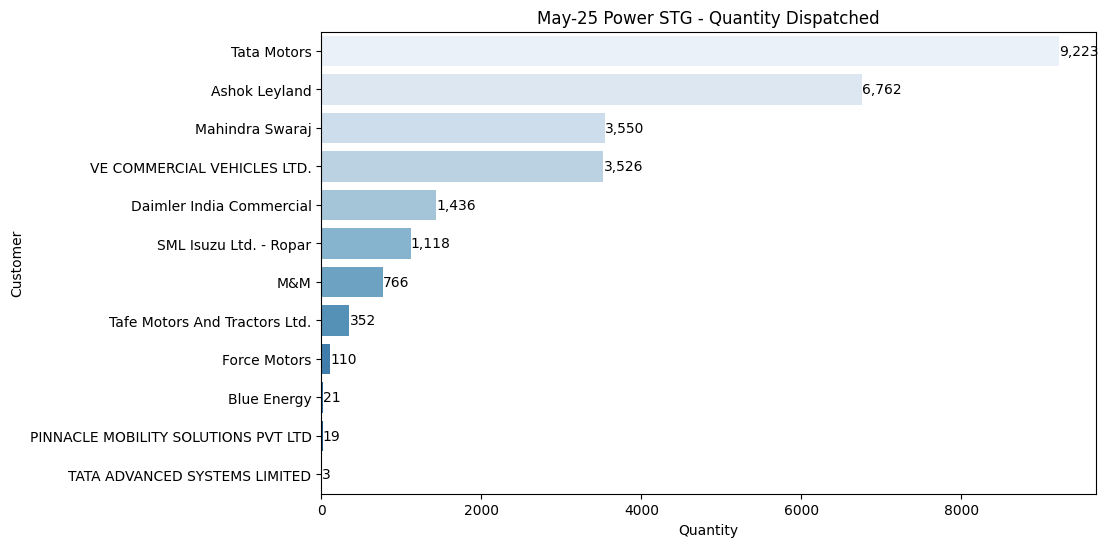

In [148]:

# --------------------------------
# 🔹 Power STG Quantity Chart
power_stg = Monthwise_data[Monthwise_data['Material Category'] == 'Power STG']
power_stg_qty = power_stg.groupby('Updated Customer Name')['Inv Qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=power_stg_qty.values, y=power_stg_qty.index, palette='Blues')

# Add labels
for i, (value, name) in enumerate(zip(power_stg_qty.values, power_stg_qty.index)):
    plt.text(value, i, f'{value:,.0f}', va='center')

plt.title(f'{month_selected} Power STG - Quantity Dispatched')
plt.xlabel('Quantity')
plt.ylabel('Customer')
plt.show()


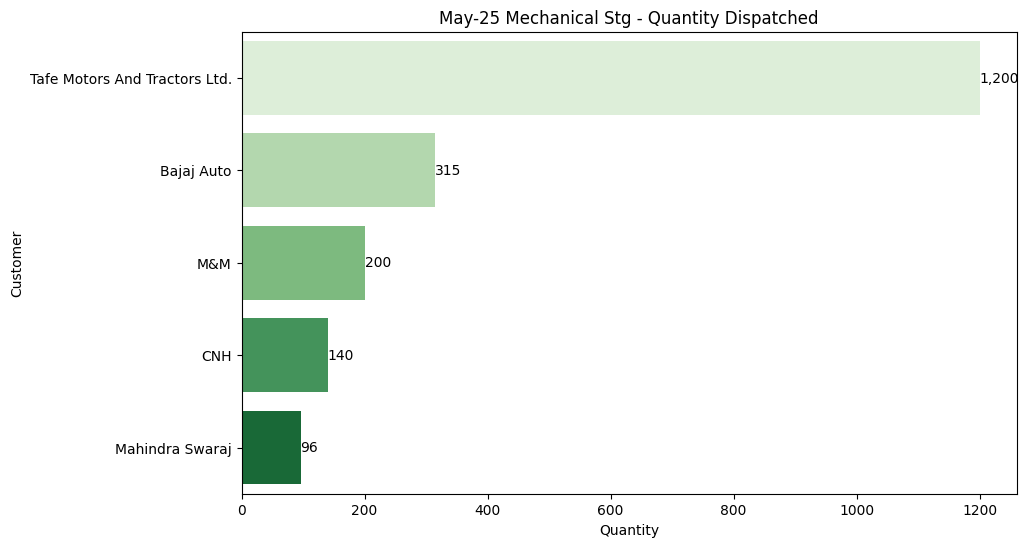

In [145]:
# --------------------------------
# 🔹 Mechanical Stg Quantity Chart
mech_stg = Monthwise_data[Monthwise_data['Material Category'] == 'Mechanical Stg']
mech_stg_qty = mech_stg.groupby('Updated Customer Name')['Inv Qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mech_stg_qty.values, y=mech_stg_qty.index, palette='Greens')

# Add labels
for i, (value, name) in enumerate(zip(mech_stg_qty.values, mech_stg_qty.index)):
    plt.text(value, i, f'{value:,.0f}', va='center')

plt.title(f'{month_selected} Mechanical Stg - Quantity Dispatched')
plt.xlabel('Quantity')
plt.ylabel('Customer')
plt.show()

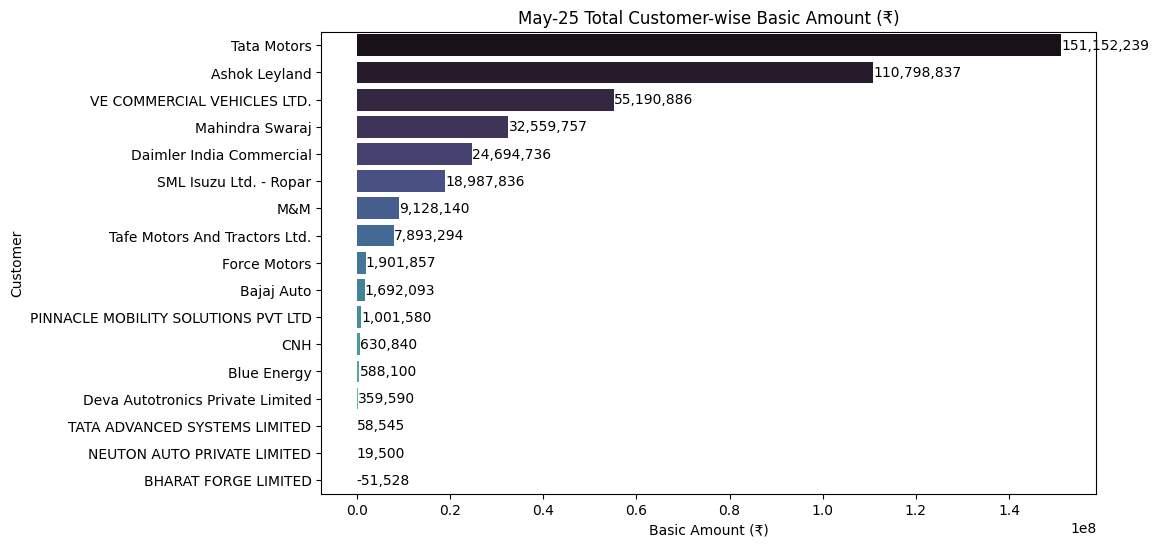

In [146]:
customer_value = Monthwise_data.groupby('Updated Customer Name')['Basic Amt.LocCur'].sum().sort_values(ascending=False)

# 🔧 Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_value.values, y=customer_value.index, palette='mako')

# Add ₹ value labels to bars
for i, (value, name) in enumerate(zip(customer_value.values, customer_value.index)):
    plt.text(value, i, f'{value:,.0f}', va='center')

plt.title(f'{month_selected} Total Customer-wise Basic Amount (₹)')
plt.xlabel('Basic Amount (₹)')
plt.ylabel('Customer')
plt.show()

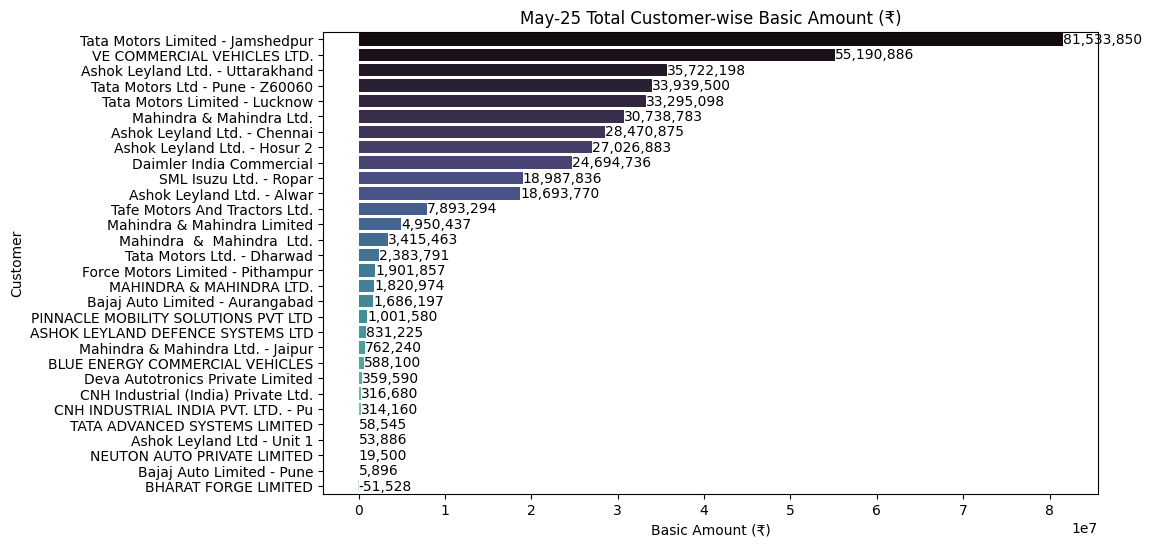

In [153]:
customer_value = Monthwise_data.groupby('Customer Name')['Basic Amt.LocCur'].sum().sort_values(ascending=False)

# 🔧 Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_value.values, y=customer_value.index, palette='mako')

# Add ₹ value labels to bars
for i, (value, name) in enumerate(zip(customer_value.values, customer_value.index)):
    plt.text(value, i, f'{value:,.0f}', va='center')

plt.title(f'{month_selected} Total Customer-wise Basic Amount (₹)')
plt.xlabel('Basic Amount (₹)')
plt.ylabel('Customer')
plt.show()

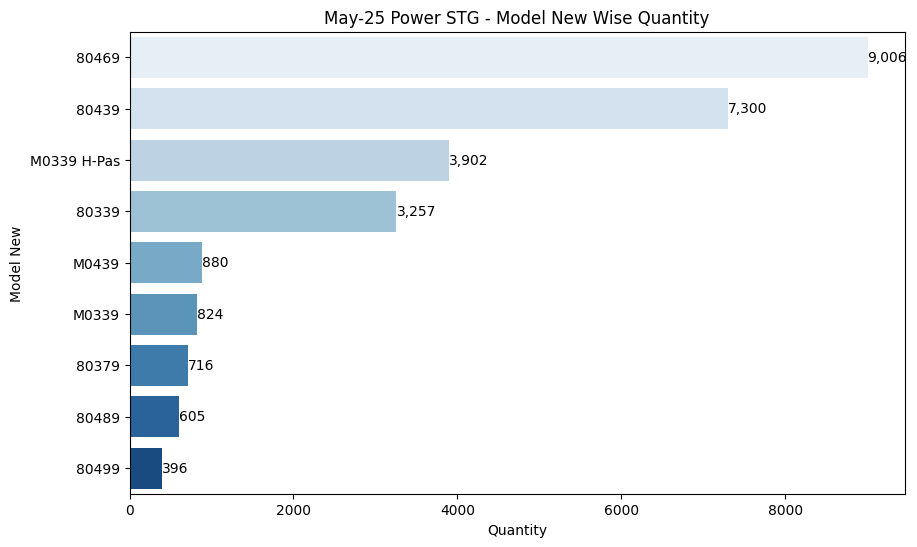

In [149]:
power_stg = Monthwise_data[Monthwise_data['Material Category'] == 'Power STG']
power_stg_model_qty = power_stg.groupby('Model New')['Inv Qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=power_stg_model_qty.values, y=power_stg_model_qty.index, palette='Blues')

for i, (value, name) in enumerate(zip(power_stg_model_qty.values, power_stg_model_qty.index)):
    plt.text(value, i, f'{value:,.0f}', va='center')

plt.title(f'{month_selected} Power STG - Model New Wise Quantity')
plt.xlabel('Quantity')
plt.ylabel('Model New')
plt.show()

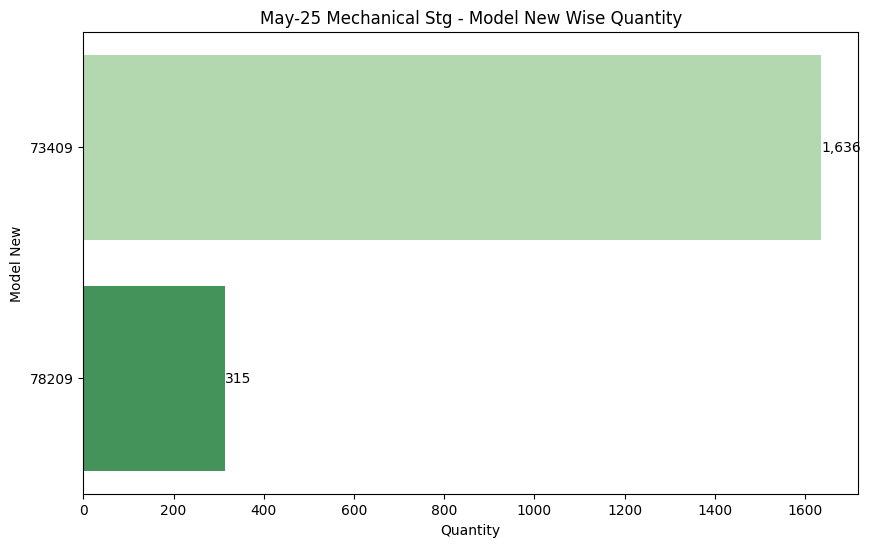

In [151]:
mech_stg = Monthwise_data[Monthwise_data['Material Category'] == 'Mechanical Stg']
mech_stg_model_qty = mech_stg.groupby('Model New')['Inv Qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=mech_stg_model_qty.values, y=mech_stg_model_qty.index, palette='Greens')

for i, (value, name) in enumerate(zip(mech_stg_model_qty.values, mech_stg_model_qty.index)):
    plt.text(value, i, f'{value:,.0f}', va='center')

plt.title(f'{month_selected} Mechanical Stg - Model New Wise Quantity')
plt.xlabel('Quantity')
plt.ylabel('Model New')
plt.show()


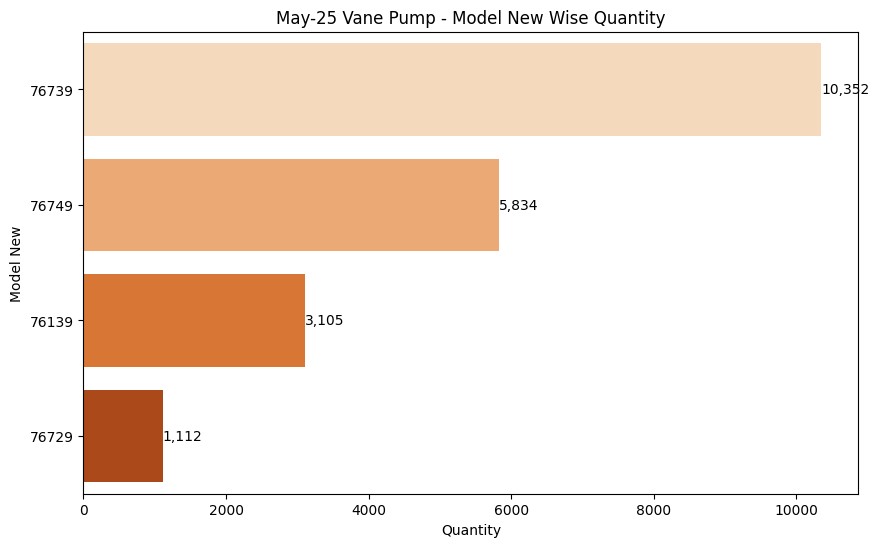

In [152]:
vane_pump = Monthwise_data[Monthwise_data['Material Category'] == 'Vane Pump']
vane_pump_model_qty = vane_pump.groupby('Model New')['Inv Qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=vane_pump_model_qty.values, y=vane_pump_model_qty.index, palette='Oranges')

for i, (value, name) in enumerate(zip(vane_pump_model_qty.values, vane_pump_model_qty.index)):
    plt.text(value, i, f'{value:,.0f}', va='center')

plt.title(f'{month_selected} Vane Pump - Model New Wise Quantity')
plt.xlabel('Quantity')
plt.ylabel('Model New')
plt.show()

In [171]:
customer_input = 'tata'.lower()

Multiple matches found:
1: Tata Motors Limited - Jamshedpur
2: Tata Motors Limited - Lucknow
3: Tata Motors Ltd - Pune - Z60060
4: Tata Motors Ltd. - Dharwad
5: TATA ADVANCED SYSTEMS LIMITED
Enter the number of the customer you want to select: 3
Customer Selected: Tata Motors Ltd - Pune - Z60060


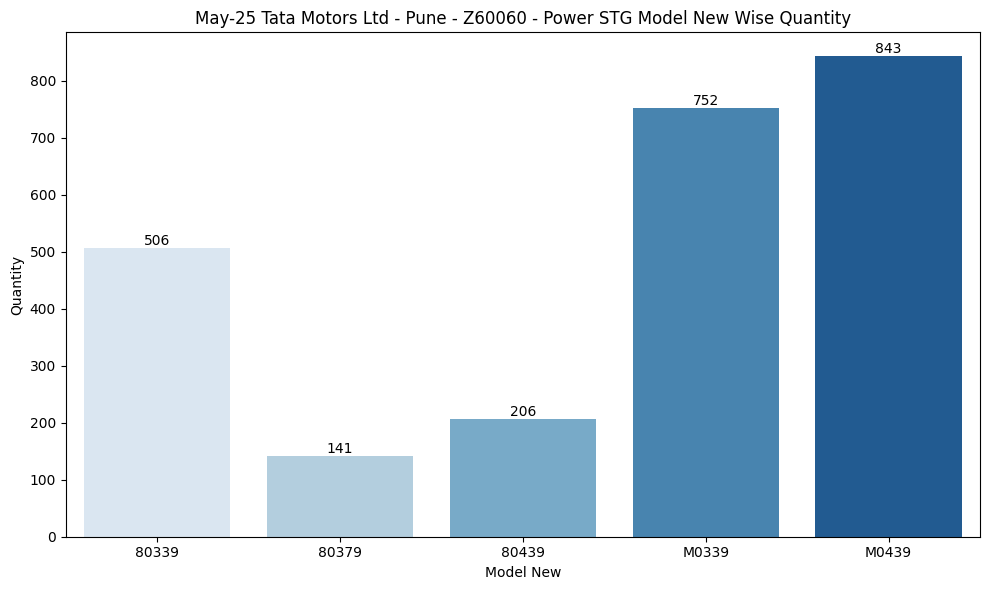

In [172]:
Monthwise_data = dispatch_data[dispatch_data['Month-Year'] == month_selected]

# Find all possible matching customers
matching_customers = Monthwise_data['Customer Name'].dropna().unique()
matching_customer = [c for c in matching_customers if customer_input in c.lower()]

# If multiple matches, show them
if matching_customer:
    print('Multiple matches found:')
    for idx, cust in enumerate(matching_customer):
        print(f"{idx + 1}: {cust}")

    # Let user pick
    selected_index = int(input("Enter the number of the customer you want to select: ")) - 1
    customer_selected = matching_customer[selected_index]
    print(f'Customer Selected: {customer_selected}')

    # Filter Power STG for this customer
    power_stg = Monthwise_data[
        (Monthwise_data['Material Category'] == 'Power STG') &
        (Monthwise_data['Customer Name'] == customer_selected)
    ]

    # Group by Model New for quantity
    customer_model_qty = power_stg.groupby('Model New')['Inv Qty'].sum().reset_index().sort_values('Model New')

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=customer_model_qty, x='Model New', y='Inv Qty', palette='Blues')

    # Add quantity labels
    for i, row in customer_model_qty.iterrows():
        plt.text(i, row['Inv Qty'], f'{row["Inv Qty"]:,.0f}', ha='center', va='bottom')

    plt.title(f'{month_selected} {customer_selected} - Power STG Model New Wise Quantity')
    plt.xlabel('Model New')
    plt.ylabel('Quantity')
    plt.tight_layout()
    plt.show()

else:
    print('No matching customer found.')

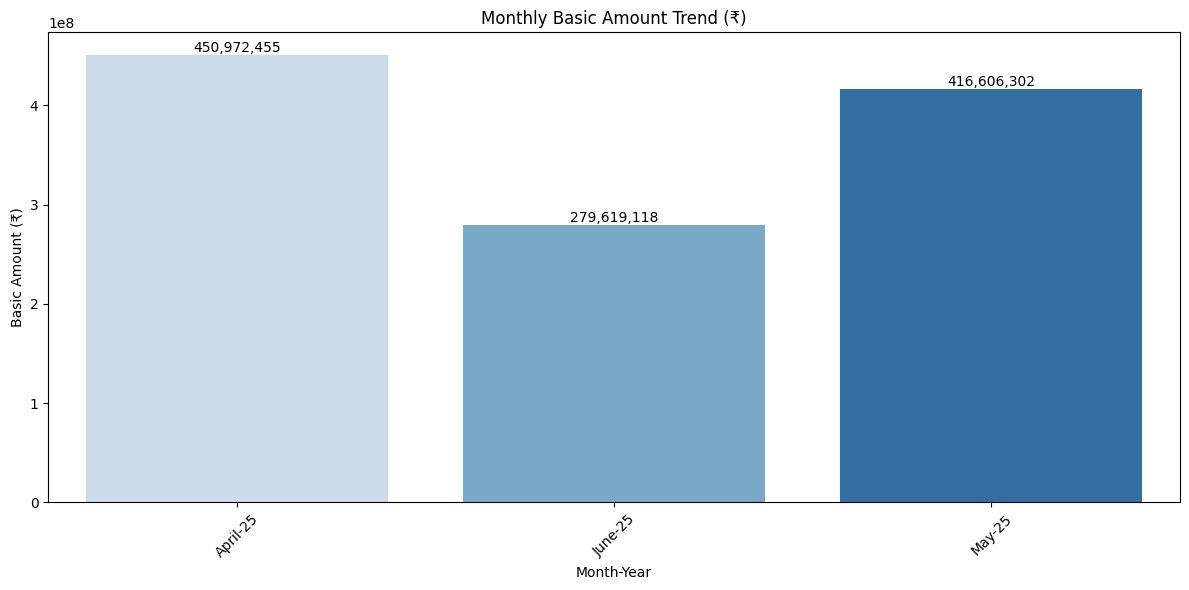

In [156]:
monthly_sales = dispatch_data.groupby('Month-Year')['Basic Amt.LocCur'].sum().reset_index()

# Plot Bar Chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=monthly_sales, x='Month-Year', y='Basic Amt.LocCur', palette='Blues')

# Add ₹ labels on bars
for i, row in monthly_sales.iterrows():
    plt.text(i, row['Basic Amt.LocCur'], f'{row["Basic Amt.LocCur"]:,.0f}', ha='center', va='bottom')

# Titles & Labels
plt.title('Monthly Basic Amount Trend (₹)')
plt.xlabel('Month-Year')
plt.ylabel('Basic Amount (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()